In [131]:
# http://iamtrask.github.io/2015/07/12/basic-python-network/
# Данная сеть предназначена для решения достаточно простой задачи
# использовать данные на входе для предсказания значения на выходе
# Inputs 	Output
# 0 0 1 	0
# 1 1 1 	1
# 1 0 1 	1
# 0 1 1 	0

#для построения графиков внутри notebook'a
%pylab inline 
import pylab as pl # библиотека для построения графиков
import numpy as np # библиотека для осуществления вычислений

Populating the interactive namespace from numpy and matplotlib


In [132]:
# sigmoid function - или функция активации нейронов
def sigmoid(x,deriv=False): 
    if(deriv==True): # если истина  - то нам нужна производная
        return x*(1-x) # возвращаем производную функции
    return 1/(1+np.exp(-x)) # возвращаем функцию

In [133]:
# для примера построим график функции
tmpX = np.arange(-5,5,0.1) 

In [134]:
tmpY = sigmoid(tmpX)

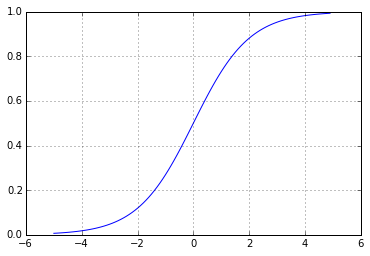

In [135]:
pl.plot(tmpX,tmpY)
plt.grid()

In [136]:
# Входные данные 3 входа и 4 примера
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])
print(X)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [137]:
# Выходные данные - 1 выход и 4 примера. T - транспонировать
y = np.array([[0,0,1,1]]).T 
print(y)

[[0]
 [0]
 [1]
 [1]]


In [138]:
# При генерации случаных чисел
# использовать детерминированный подход, т.е.
# при каждом запуске будут генерироваться 
# по одним и тем же правилам
np.random.seed(1)

In [139]:
# генерируем "синапсы" - веса связи между нейронами
# у нас 3 входа и 1 выход - получаем 3 связи
syn0 = 2*np.random.random((3,1)) - 1
print(syn0)

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [140]:
errors=np.array([])
numJ =np.array([])
for j in range(1000):
# forward propagation
    # Загружаем сразу все тренировочные примеры
    l0 = X
    # Умножаем вход на веса
    # это и есть попытка "предсказать значение"
    # l0 - матрица 4x3 syn0 - 3x1
    # при перемножении - размерность в середине должна совпадать 4х3 * 3х1 = 4х1
    l1 = sigmoid(np.dot(l0,syn0))

    # сравниваем с ожидаемым результатом
    # и сохраняем ошибку
    l1_error = y - l1

    # формируем массив - номер обучения
    # и средняя ошибка и все веса
    # это для порсотра режима обучения
    if (j%10==0):
        numJ=np.append(numJ,j)
        errors=np.append(errors,np.mean(np.abs(l1_error)))
        # print(syn0)
        
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    # вычисляем разницу, но умножая на производную функции активации 
    #
    l1_delta = l1_error * sigmoid(l1,True)

    # Обновляем значения весов
    # Самая главная часть 
    syn0 += np.dot(l0.T,l1_delta)

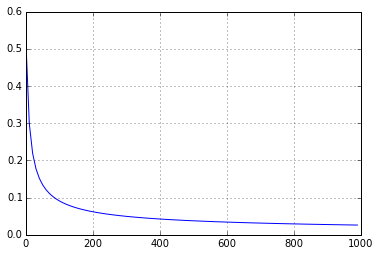

In [141]:
#Нарисуем кривую изменения ошибки
#print(numJ)
#print(errors)
pl.plot(numJ,errors)
pl.grid()

In [142]:
print ("Output After Training:")
print (l1)
print('Synapse')
print(syn0)

Output After Training:
[[ 0.03178421]
 [ 0.02576499]
 [ 0.97906682]
 [ 0.97414645]]
Synapse
[[ 7.26283009]
 [-0.21614618]
 [-3.41703015]]


In [143]:
# попробуем проверить - должно получится значение близкое к 0
testIn = np.array([0,0,1])
testOut = sigmoid(np.dot(testIn,syn0))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

0.0317674488504
0.0


In [144]:
# попробуем проверить - должно получится значение близкое к 1
testIn = np.array([1,0,1])
testOut = sigmoid(np.dot(testIn,syn0))
print(testOut[0])
# результат округляем
print(round(testOut[0]))

0.979077792394
1.0
